In [1]:
import os
import glob
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import imageio

In [4]:
generator = tf.keras.models.load_model('../raw_data/kagglegan_gen.h5')

2022-03-07 15:13:23.680329: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
generator.compile()

In [5]:
def save_model(epoch):
    output_path = 'MODEL_models'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    filename = os.path.join(output_path, f"model_gen_epoch_{epoch}.h5")
    generator.save(filename)

In [6]:
save_model(1)

In [43]:
# One single_imgs folder, inside of this 25 folders
# each img is img_1_epoch_10 etc.
# fixed noise size (25,100)
# fixed_noise[0] -> img_0
fixed_noise = tf.random.normal([25, 1, 100])
def save_singles(epoch, total = 25):
    for i in range(total):
        output_path = f"raw_data/img_{i}"
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        filename = os.path.join(output_path, f"img_{i}_epoch_{epoch}.png")
        prediction = generator.predict(fixed_noise[i])[0]
        prediction = prediction*0.5 + 0.5
        fig = plt.figure(figsize=(4,4))
        plt.axis('off')
        plt.imshow(prediction)
        plt.savefig(filename)

In [44]:
fixed_noise[1].shape

TensorShape([1, 100])

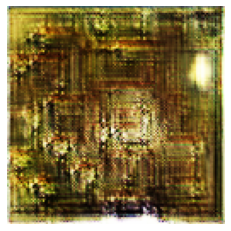

In [9]:
fig = plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(generator.predict(fixed_noise[8])[0]*0.5+0.5);

/var/folders/5l/tq6yb1n15tn2vbfh24z0ggsr0000gp/T/ipykernel_8056/333670338.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,4))


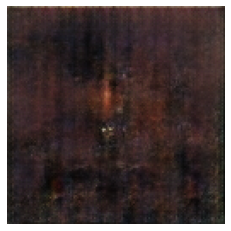

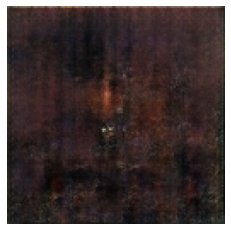

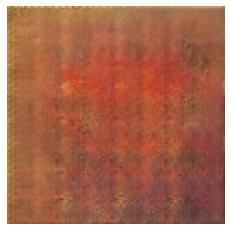

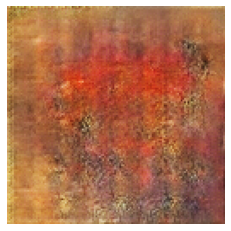

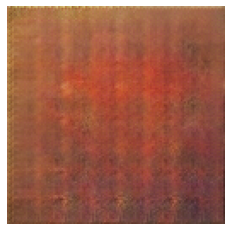

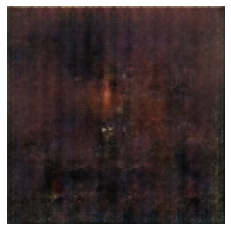

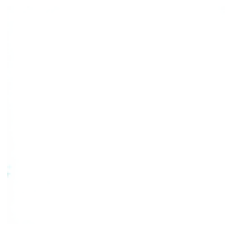

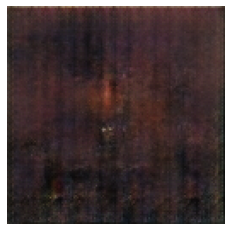

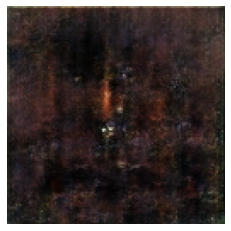

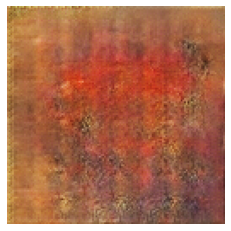

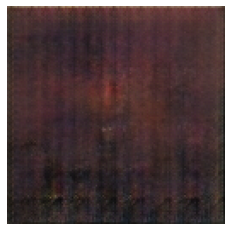

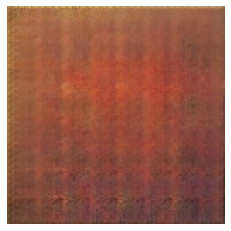

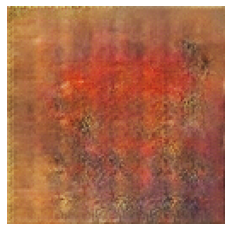

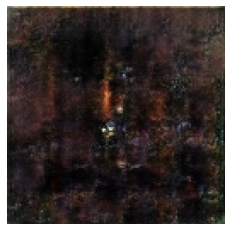

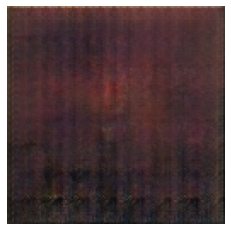

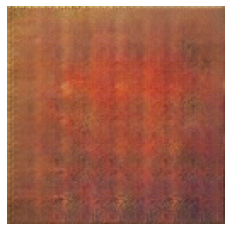

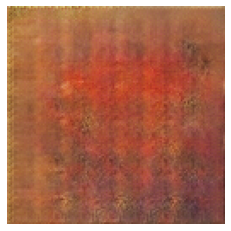

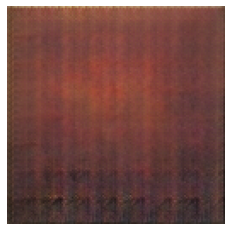

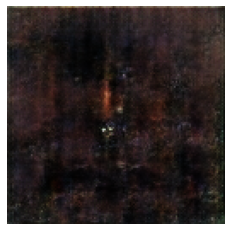

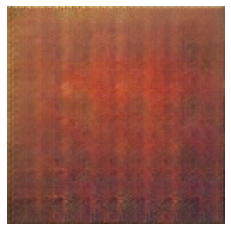

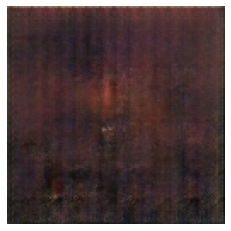

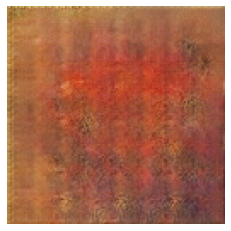

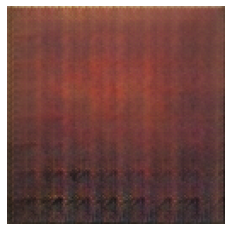

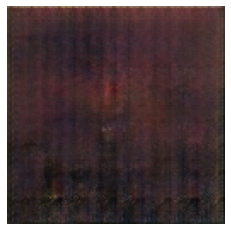

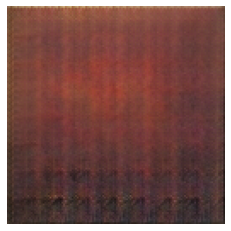

In [46]:
save_singles(1)

In [ ]:
def save_images(model, epoch, test_input):
    image_array = np.full((
        PREVIEW_MARGIN + (PREVIEW_ROWS * (IMAGE_SIZE + PREVIEW_MARGIN)),
        PREVIEW_MARGIN + (PREVIEW_COLS * (IMAGE_SIZE + PREVIEW_MARGIN)), 3),
        255, dtype=np.uint8)
    generated_images = model(test_input, training=False)
    generated_images = 0.5 * generated_images + 0.5

    image_count = 0
    for row in range(PREVIEW_ROWS):
        for col in range(PREVIEW_COLS):
            r = row * (IMAGE_SIZE + PREVIEW_MARGIN) + PREVIEW_MARGIN
            c = col * (IMAGE_SIZE + PREVIEW_MARGIN) + PREVIEW_MARGIN
            image_array[r:r + IMAGE_SIZE, c:c +
                        IMAGE_SIZE] = generated_images[image_count] * 255
            image_count += 1
    output_path = 'MODEL'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    filename = os.path.join(output_path, f"epoch_{epoch}.png")
    im = Image.fromarray(image_array)
    im.save(filename)

In [52]:
# GIF building 
anim_file = 'LOC_TO_SAVE_IMG_NAME.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('../raw_data/impress*.jpeg')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [2]:
generator = tf.keras.models.load_model('../raw_data/model_gen_epoch_200.h5')

2022-03-08 10:04:04.726463: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
generator.compile()

In [4]:
fixed_noise = tf.random.normal([25, 1, 100])


In [5]:
generator.predict(fixed_noise[1])

array([[[[ 0.5300241 ,  0.7439666 ,  0.15066937],
         [-0.27417982, -0.5604898 , -0.29106253],
         [-0.52820814, -0.7508545 , -0.8371617 ],
         ...,
         [-0.73652506, -0.84066784, -0.79731125],
         [-0.7350704 , -0.7170207 , -0.62521154],
         [ 0.14189006, -0.08047749, -0.04735062]],

        [[-0.31530377, -0.31378022, -0.07226792],
         [-0.5142767 , -0.6748597 , -0.15954456],
         [-0.8820733 , -0.91473925, -0.9706842 ],
         ...,
         [-0.8189972 , -0.9488936 , -0.963802  ],
         [-0.8656443 , -0.8255026 , -0.867645  ],
         [-0.21704516, -0.5013885 , -0.69326246]],

        [[ 0.6437296 ,  0.61249924,  0.250586  ],
         [-0.37361142, -0.8183691 , -0.64491755],
         [-0.79409724, -0.891304  , -0.9760519 ],
         ...,
         [-0.72120935, -0.8816995 , -0.96084714],
         [-0.75883883, -0.70298487, -0.8114489 ],
         [-0.3421597 , -0.3636538 , -0.74983186]],

        ...,

        [[ 0.45877197,  0.03861142,  0